# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Silvia Zahro
- **Email:** mc224d5x0314@student.devacademy.id
- **ID Dicoding:** MC224D5X0314

## Menentukan Pertanyaan Bisnis

- 1. Apakah terdapat pola tertentu dalam jumlah transaksi berdasarkan hari dalam seminggu atau bulan dalam setahun?
- 2. Apakah ada hubungan antara waktu pengiriman dengan rating review pelanggan?
- 3. Produk dalam kategori apa yang paling sering dibeli?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium
from datetime import datetime, timedelta
from folium.plugins import HeatMap
!pip install streamlit
import streamlit as st

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 58.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 83.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.6 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Wrangling

### Gathering Data

In [3]:
customers = pd.read_csv("/content/drive/MyDrive/E-commerce-public-dataset/E-Commerce Public Dataset/customers_dataset.csv")
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
geolocation = pd.read_csv("/content/drive/MyDrive/E-commerce-public-dataset/E-Commerce Public Dataset/geolocation_dataset.csv")
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [5]:
order_items = pd.read_csv("/content/drive/MyDrive/E-commerce-public-dataset/E-Commerce Public Dataset/order_items_dataset.csv")
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [6]:
order_payments = pd.read_csv("/content/drive/MyDrive/E-commerce-public-dataset/E-Commerce Public Dataset/order_payments_dataset.csv")
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [7]:
order_reviews = pd.read_csv("/content/drive/MyDrive/E-commerce-public-dataset/E-Commerce Public Dataset/order_reviews_dataset.csv")
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [8]:
orders = pd.read_csv("/content/drive/MyDrive/E-commerce-public-dataset/E-Commerce Public Dataset/orders_dataset.csv")
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [9]:
products = pd.read_csv("/content/drive/MyDrive/E-commerce-public-dataset/E-Commerce Public Dataset/products_dataset.csv")
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [10]:
sellers = pd.read_csv("/content/drive/MyDrive/E-commerce-public-dataset/E-Commerce Public Dataset/sellers_dataset.csv")
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [11]:
category_translation = pd.read_csv("/content/drive/MyDrive/E-commerce-public-dataset/E-Commerce Public Dataset/product_category_name_translation.csv")
category_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [12]:
# Melihat jumlah baris dan kolom di setiap dataset
for name, df in zip(["customers", "geolocation", "order_items", "order_payments", "order_reviews", "orders", "products", "sellers", "category_translation"],
                     [customers, geolocation, order_items, order_payments, order_reviews, orders, products, sellers, category_translation]):
    print(f"Dataset {name} memiliki {df.shape[0]} baris dan {df.shape[1]} kolom")

Dataset customers memiliki 99441 baris dan 5 kolom
Dataset geolocation memiliki 1000163 baris dan 5 kolom
Dataset order_items memiliki 112650 baris dan 7 kolom
Dataset order_payments memiliki 103886 baris dan 5 kolom
Dataset order_reviews memiliki 99224 baris dan 7 kolom
Dataset orders memiliki 99441 baris dan 8 kolom
Dataset products memiliki 32951 baris dan 9 kolom
Dataset sellers memiliki 3095 baris dan 4 kolom
Dataset category_translation memiliki 71 baris dan 2 kolom


In [13]:
# Menggabungkan data yang diperlukan
dataset = orders.merge(customers, on="customer_id", how="left") \
                  .merge(order_items, on="order_id", how="left") \
                  .merge(order_payments, on="order_id", how="left") \
                  .merge(order_reviews, on="order_id", how="left") \
                  .merge(products, on="product_id", how="left") \
                  .merge(sellers, on="seller_id", how="left") \
                  .merge(category_translation, on="product_category_name", how="left")

# Menampilkan informasi dataset yang sudah digabungkan
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       119143 non-null  object 
 1   customer_id                    119143 non-null  object 
 2   order_status                   119143 non-null  object 
 3   order_purchase_timestamp       119143 non-null  object 
 4   order_approved_at              118966 non-null  object 
 5   order_delivered_carrier_date   117057 non-null  object 
 6   order_delivered_customer_date  115722 non-null  object 
 7   order_estimated_delivery_date  119143 non-null  object 
 8   customer_unique_id             119143 non-null  object 
 9   customer_zip_code_prefix       119143 non-null  int64  
 10  customer_city                  119143 non-null  object 
 11  customer_state                 119143 non-null  object 
 12  order_item_id                 

In [14]:
# Melihat 5 baris pertama
dataset.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,178.0,1.0,400.0,19.0,13.0,19.0,31570.0,belo horizonte,SP,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,232.0,1.0,420.0,24.0,19.0,21.0,14840.0,guariba,SP,auto


In [15]:
# Menampilkan jumlah baris dan kolom dalam dataset
(dataset.shape)

(119143, 40)

In [16]:
# Menyimpan data keseluruhan ke dalam file CSV
dataset.to_csv('dataset.csv', index=False)
print("DataFrame have been saved to 'dataset.csv'")

DataFrame have been saved to 'dataset.csv'


**Insight:**
- Dataset memiliki **119.143 baris dan 40 kolom**

### Assessing Data

In [17]:
#Melihat apakah ada Missing Values
dataset.isnull().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,177
order_delivered_carrier_date,2086
order_delivered_customer_date,3421
order_estimated_delivery_date,0
customer_unique_id,0
customer_zip_code_prefix,0


In [18]:
print("Jumlah duplikasi: ", dataset.duplicated().sum())

Jumlah duplikasi:  0


In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       119143 non-null  object 
 1   customer_id                    119143 non-null  object 
 2   order_status                   119143 non-null  object 
 3   order_purchase_timestamp       119143 non-null  object 
 4   order_approved_at              118966 non-null  object 
 5   order_delivered_carrier_date   117057 non-null  object 
 6   order_delivered_customer_date  115722 non-null  object 
 7   order_estimated_delivery_date  119143 non-null  object 
 8   customer_unique_id             119143 non-null  object 
 9   customer_zip_code_prefix       119143 non-null  int64  
 10  customer_city                  119143 non-null  object 
 11  customer_state                 119143 non-null  object 
 12  order_item_id                 

In [20]:
# Menampilkan tipe data setelah konversi
print(dataset.dtypes)

order_id                          object
customer_id                       object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
customer_unique_id                object
customer_zip_code_prefix           int64
customer_city                     object
customer_state                    object
order_item_id                    float64
product_id                        object
seller_id                         object
shipping_limit_date               object
price                            float64
freight_value                    float64
payment_sequential               float64
payment_type                      object
payment_installments             float64
payment_value                    float64
review_id                         object
review_score                     float64
review_comment_t

**Insight:**
- Terdapat beberapa kolom dengan nilai yang hilang (missing values) dalam dataset, yang dapat memengaruhi analisis.
- Untuk menangani hal ini, perlu dilakukan penghapusan nilai yang hilang berdasarkan relevansi kolom terhadap analisis yang akan dilakukan.

### Cleaning Data

In [21]:
# Menghapus nilai null dari kolom yang penting dalam analisis
dataset = dataset.dropna(subset=['order_item_id', 'shipping_limit_date', 'price',
                                  'freight_value', 'payment_sequential', 'payment_type',
                                  'payment_installments', 'payment_value'])

# Menampilkan ukuran dataset setelah penghapusan data null
print(f"Dataset setelah menghapus nilai null: {dataset.shape}")

Dataset setelah menghapus nilai null: (118307, 40)


Kolom **order_item_id**, **shipping_limit_date**, **price**, **freight_value**, **payment_sequential**, **payment_type**, **payment_installments**, dan **payment_value** dianggap penting dalam analisis karena berisi informasi utama tentang transaksi dan pembayaran pelanggan. Jika data di kolom-kolom ini kosong (null), maka informasi transaksi tersebut tidak lengkap atau tidak valid.

In [22]:
# Menghapus kolom yang tidak diperlukan dalam tahap analisis
dataset.drop(columns=['seller_zip_code_prefix', 'customer_zip_code_prefix', 'product_photos_qty',
                      'product_name_lenght', 'review_comment_title', 'review_id', 'seller_id',
                      'product_id', 'customer_id', 'order_delivered_carrier_date',
                      'product_description_lenght', 'product_category_name_english',
                      'review_creation_date', 'review_answer_timestamp'], inplace=True)

# Menampilkan hasil akhir setelah penghapusan kolom yang tidak relevan
print(f"Dataset setelah menghapus kolom yang tidak relevan: {dataset.shape}")


Dataset setelah menghapus kolom yang tidak relevan: (118307, 26)


<ipython-input-22-cafd4d65adc9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop(columns=['seller_zip_code_prefix', 'customer_zip_code_prefix', 'product_photos_qty',


Kolom tersebut dihapus karena tidak relevan dengan analisis. Menghapus kolom ini membuat dataset lebih fokus dan mudah dianalisis.

In [23]:
dataset.isnull().sum()

,0
order_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,15
order_delivered_customer_date,2588
order_estimated_delivery_date,0
customer_unique_id,0
customer_city,0
customer_state,0
order_item_id,0


In [24]:
# Mengisi nilai kosong pada kolom numerik dengan nilai rata-rata
numerical_columns = ['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']
dataset[numerical_columns] = dataset[numerical_columns].fillna(dataset[numerical_columns].mean())

In [25]:
# Mengisi nilai kosong pada kolom kategorikal dengan nilai modus (paling sering muncul)
categorical_columns = ['seller_city', 'seller_state', 'product_category_name']
dataset[categorical_columns] = dataset[categorical_columns].apply(lambda col: col.fillna(col.mode()[0]))

In [26]:
# Mengisi nilai kosong pada beberapa kolom dengan aturan tertentu
columns_to_fill = ['order_approved_at', 'order_delivered_customer_date', 'order_estimated_delivery_date',
                   'review_score', 'review_comment_message']

for column in columns_to_fill:
    if dataset[column].dtype in ['int64', 'float64']:
        dataset[column].fillna(0, inplace=True)  # Isi dengan 0 jika kolom berisi angka
    else:
        dataset[column].fillna("-", inplace=True)  # Isi dengan "-" jika bukan numerik

<ipython-input-26-2d3503da7802>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[column].fillna("-", inplace=True)  # Isi dengan "-" jika bukan numerik
<ipython-input-26-2d3503da7802>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

In [27]:
dataset.isnull().sum()

,0
order_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_customer_date,0
order_estimated_delivery_date,0
customer_unique_id,0
customer_city,0
customer_state,0
order_item_id,0


In [28]:
(dataset.columns)

Index(['order_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'customer_unique_id', 'customer_city',
       'customer_state', 'order_item_id', 'shipping_limit_date', 'price',
       'freight_value', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_score',
       'review_comment_message', 'product_category_name', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_city', 'seller_state'],
      dtype='object')

In [29]:
# Menampilkan jumlah baris dan kolom dalam dataset setelah penghapusan
(dataset.shape)

(118307, 26)

In [30]:
# Menyimpan data keseluruhan yang sudah bersih ke dalam file CSV
dataset.to_csv('dataset_cleaned.csv', index=False)
print("DataFrame have been saved to 'dataset_cleaned.csv'")

DataFrame have been saved to 'dataset_cleaned.csv'


**Insight:**
- Semua data sudah bersih dan siap masuk ke tahap EDA.

## Exploratory Data Analysis (EDA)

### Explore ...

In [31]:
# Menampilkan data awal
dataset.head()

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state,order_item_id,...,payment_value,review_score,review_comment_message,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1.0,...,18.12,4.0,"Não testei o produto ainda, mas ele veio corre...",utilidades_domesticas,500.0,19.0,8.0,13.0,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1.0,...,2.00,4.0,"Não testei o produto ainda, mas ele veio corre...",utilidades_domesticas,500.0,19.0,8.0,13.0,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1.0,...,18.59,4.0,"Não testei o produto ainda, mas ele veio corre...",utilidades_domesticas,500.0,19.0,8.0,13.0,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,barreiras,BA,1.0,...,141.46,4.0,Muito bom o produto.,perfumaria,400.0,19.0,13.0,19.0,belo horizonte,SP
4,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,1.0,...,179.12,5.0,-,automotivo,420.0,24.0,19.0,21.0,guariba,SP


In [32]:
# Statistik deskriptif
dataset.describe(include="all")

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state,order_item_id,...,payment_value,review_score,review_comment_message,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_city,seller_state
count,118307,118307,118307,118307,118307,118307,118307,118307,118307,118307.000000,...,118307.000000,118307.000000,118307,118307,118307.000000,118307.000000,118307.000000,118307.000000,118307,118307
unique,98665,7,98111,90174,95664,449,95419,4110,27,NaN,...,NaN,NaN,35691,73,NaN,NaN,NaN,NaN,611,23
top,895ab968e7bb0d5659d16cd74cd1650c,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,-,2017-12-20 00:00:00,9a736b248f67d166d2fbb006bcb877c3,sao paulo,SP,NaN,...,NaN,NaN,-,cama_mesa_banho,NaN,NaN,NaN,NaN,sao paulo,SP
freq,63,115720,63,63,2588,656,75,18727,49862,NaN,...,NaN,NaN,68633,13697,NaN,NaN,NaN,NaN,29293,84377
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.196523,...,172.575102,3.998140,NaN,NaN,2112.278949,30.265507,16.619722,23.074979,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.699474,...,267.110727,1.429567,NaN,NaN,3786.418894,16.188045,13.452617,11.748241,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,0.000000,0.000000,NaN,NaN,0.000000,7.000000,2.000000,6.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,60.850000,3.000000,NaN,NaN,300.000000,18.000000,8.000000,15.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,108.200000,5.000000,NaN,NaN,700.000000,25.000000,13.000000,20.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,189.260000,5.000000,NaN,NaN,1800.000000,38.000000,20.000000,30.000000,NaN,NaN


In [65]:
# Mengecek jumlah kategori unik pada beberapa kolom kategorikal
print("\nJumlah kategori unik pada kolom 'product_category_name':", dataset['product_category_name'].nunique())
print("Jumlah kategori unik pada kolom 'customer_city':", dataset['customer_city'].nunique())
print("Jumlah kategori unik pada kolom 'seller_city':", dataset['seller_city'].nunique())


Jumlah kategori unik pada kolom 'product_category_name': 73
Jumlah kategori unik pada kolom 'customer_city': 4110
Jumlah kategori unik pada kolom 'seller_city': 611


In [59]:
# Distribusi jumlah pesanan per hari
dataset['order_purchase_timestamp'] = pd.to_datetime(dataset['order_purchase_timestamp'])
dataset['hari'] = dataset['order_purchase_timestamp'].dt.day_name()
hari_transaksi = dataset.groupby('hari')['order_id'].count().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

hari_transaksi

,order_id
hari,
Monday,19234
Tuesday,19182
Wednesday,18489
Thursday,17692
Friday,16881
Saturday,12807
Sunday,14022


In [60]:
# Hubungan waktu pengiriman dengan review score
dataset['order_delivered_customer_date'] = pd.to_datetime(dataset['order_delivered_customer_date'])
dataset['order_delivered_customer_date']

,order_delivered_customer_date
0,2017-10-10 21:25:13
1,2017-10-10 21:25:13
2,2017-10-10 21:25:13
3,2018-08-07 15:27:45
4,2018-08-17 18:06:29
...,...
119138,2018-02-28 17:37:56
119139,2017-09-21 11:24:17
119140,2018-01-25 23:32:54
119141,2018-01-25 23:32:54


In [61]:
dataset['waktu_pengiriman'] = (dataset['order_delivered_customer_date'] - dataset['order_purchase_timestamp']).dt.days
dataset['waktu_pengiriman']

,waktu_pengiriman
0,8.0
1,8.0
2,8.0
3,13.0
4,9.0
...,...
119138,22.0
119139,24.0
119140,17.0
119141,17.0


In [66]:
agregasi_pengiriman = dataset.groupby('waktu_pengiriman')['review_score'].mean()
agregasi_pengiriman

,review_score
waktu_pengiriman,
0.0,3.421053
1.0,4.426596
2.0,4.375616
3.0,4.349479
4.0,4.320687
...,...
191.0,1.000000
194.0,3.000000
195.0,1.000000


In [62]:
# Produk dalam kategori paling sering dibeli
kategori_produk = dataset.groupby('product_category_name')['order_id'].count().sort_values(ascending=False)
kategori_produk

,order_id
product_category_name,
cama_mesa_banho,13697
beleza_saude,10029
esporte_lazer,9004
moveis_decoracao,8832
informatica_acessorios,8150
...,...
portateis_cozinha_e_preparadores_de_alimentos,15
cds_dvds_musicais,14
pc_gamer,10


In [64]:
# Tren jumlah pesanan per bulan
dataset['bulan'] = dataset['order_purchase_timestamp'].dt.strftime('%Y-%m')
dataset['bulan']

,bulan
0,2017-10
1,2017-10
2,2017-10
3,2018-07
4,2018-08
...,...
119138,2018-02
119139,2017-08
119140,2018-01
119141,2018-01


In [63]:
bulan_transaksi = dataset.groupby('bulan')['order_id'].count()
bulan_transaksi

,order_id
bulan,
2016-09,3
2016-10,385
2016-12,1
2017-01,1023
2017-02,2073
2017-03,3201
2017-04,2864
2017-05,4445
2017-06,3822


In [67]:
# Jumlah pesanan per kota
agregasi_kota = dataset.groupby('customer_city')['order_id'].count().sort_values(ascending=False).head(10)
agregasi_kota

,order_id
customer_city,
sao paulo,18727
rio de janeiro,8261
belo horizonte,3274
brasilia,2484
curitiba,1816
campinas,1742
porto alegre,1667
salvador,1537
guarulhos,1404


In [68]:
# Rata-rata harga per kategori produk
agregasi_harga = dataset.groupby('product_category_name')['price'].mean().sort_values(ascending=False).head(10)
agregasi_harga

,price
product_category_name,
pcs,1103.689136
portateis_casa_forno_e_cafe,627.509103
eletrodomesticos_2,457.529481
agro_industria_e_comercio,332.706151
instrumentos_musicais,293.398651
eletroportateis,286.297248
portateis_cozinha_e_preparadores_de_alimentos,264.568667
telefonia_fixa,226.989890
construcao_ferramentas_seguranca,210.942261


# **Insight dari Eksplorasi Data**

## **1. Distribusi dan Tren Transaksi**
- Transaksi terbanyak terjadi pada hari **Senin**, diikuti oleh Selasa dan Rabu.
- Akhir pekan (Sabtu dan Minggu) memiliki jumlah transaksi yang lebih rendah.
- Secara bulanan, transaksi meningkat pesat pada **November 2017**, yang kemungkinan berkaitan dengan promo atau musim belanja akhir tahun.
- Puncak transaksi terjadi antara **September 2017 hingga Agustus 2018**, menunjukkan pertumbuhan bisnis yang signifikan dalam periode ini.

## **2. Hubungan Waktu Pengiriman dengan Rating Review**
- Rata-rata rating pelanggan menurun seiring bertambahnya waktu pengiriman.
- Pengiriman dalam **1-3 hari memiliki rata-rata rating di atas 4,3**, sedangkan pengiriman lebih dari 10 hari cenderung mendapat rating lebih rendah.
- Pengiriman lebih dari **200 hari** bahkan memiliki rating mendekati **0-2**, menunjukkan ketidakpuasan pelanggan akibat keterlambatan ekstrem.

## **3. Produk Paling Populer dan Harga Rata-rata per Kategori**
- **Kategori produk paling sering dibeli:**
  - **cama_mesa_banho (13.697 transaksi)**
  - **beleza_saude (10.029 transaksi)**
  - **esporte_lazer (9.004 transaksi)**
- **Kategori dengan harga rata-rata tertinggi:**
  - **pcs (Rp1.103.689 per unit)**
  - **portateis_casa_forno_e_cafe (Rp627.509 per unit)**
  - **eletrodomesticos_2 (Rp457.529 per unit)**

## **4. Kota dengan Jumlah Transaksi Tertinggi**
- Sebagian besar transaksi berasal dari **São Paulo**, diikuti oleh **Rio de Janeiro** dan **Belo Horizonte**.
- Kota-kota besar di Brasil mendominasi jumlah transaksi, yang menunjukkan bahwa pelanggan potensial tersebar di pusat ekonomi utama.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah terdapat pola tertentu dalam jumlah transaksi berdasarkan hari dalam seminggu atau bulan dalam setahun?

In [33]:
# Mengubah format kolom tanggal dari objek ke datetime
tanggal_kolom = ['order_approved_at', 'order_delivered_customer_date',
                 'order_estimated_delivery_date', 'shipping_limit_date',
                 'order_purchase_timestamp']

for kolom in tanggal_kolom:
    dataset[kolom] = pd.to_datetime(dataset[kolom], errors='coerce')

<ipython-input-70-726f9fcd5789>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=order_per_day.index, y=order_per_day.values, palette="Blues")


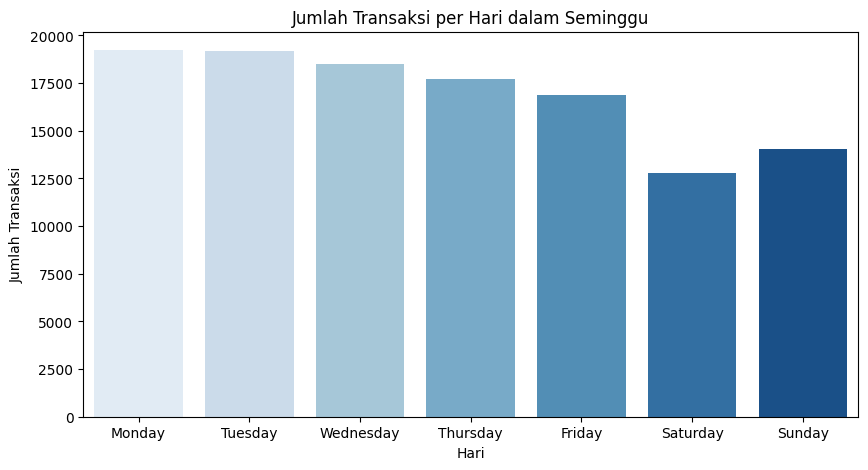

In [70]:
# --- Jumlah pesanan per hari dalam seminggu ---
dataset['hari'] = dataset['order_purchase_timestamp'].dt.day_name()
order_per_day = dataset.groupby('hari')['order_id'].count().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

plt.figure(figsize=(10, 5))
sns.barplot(x=order_per_day.index, y=order_per_day.values, palette="Blues")
plt.title('Jumlah Transaksi per Hari dalam Seminggu')
plt.xlabel('Hari')
plt.ylabel('Jumlah Transaksi')
plt.show()

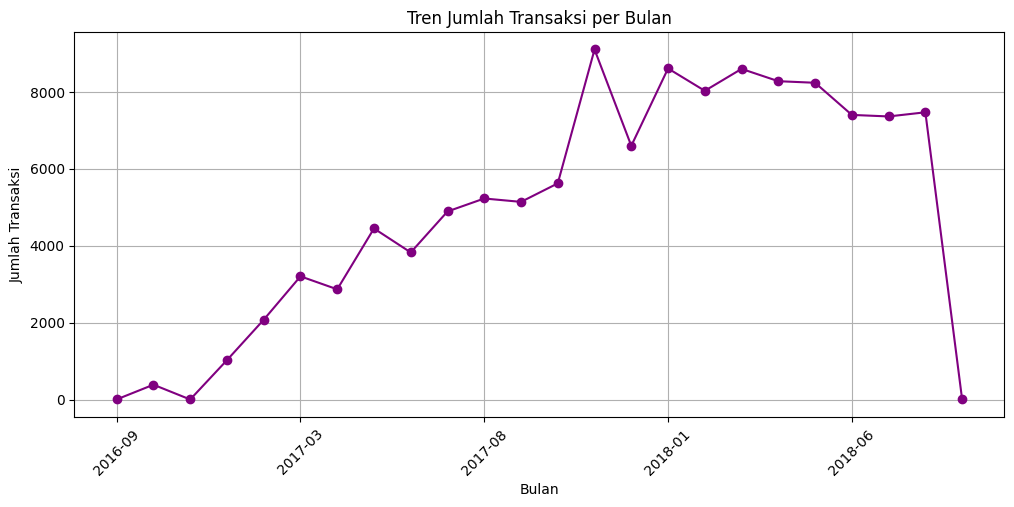

In [71]:
# --- Jumlah pesanan per bulan ---
dataset['bulan'] = dataset['order_purchase_timestamp'].dt.strftime('%Y-%m')
order_per_month = dataset.groupby('bulan')['order_id'].count()

plt.figure(figsize=(12, 5))
order_per_month.plot(kind='line', marker='o', color='purple')
plt.title('Tren Jumlah Transaksi per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=45)
plt.grid()
plt.show()

## **1. Distribusi dan Tren Transaksi**
- Transaksi terbanyak terjadi pada hari **Senin**, diikuti oleh Selasa dan Rabu.
- Akhir pekan (Sabtu dan Minggu) memiliki jumlah transaksi yang lebih rendah.
- Secara bulanan, transaksi meningkat pesat pada **November 2017**, yang kemungkinan berkaitan dengan promo atau musim belanja akhir tahun.
- Puncak transaksi terjadi antara **September 2017 hingga Agustus 2018**, menunjukkan pertumbuhan bisnis yang signifikan dalam periode ini.

### Pertanyaan 2: Apakah ada hubungan antara waktu pengiriman dengan rating review pelanggan?

<ipython-input-77-de8f8299e4bd>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=dataset["delivery_time_range"], y=dataset["review_score"], palette="coolwarm", ci=None)
<ipython-input-77-de8f8299e4bd>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dataset["delivery_time_range"], y=dataset["review_score"], palette="coolwarm", ci=None)


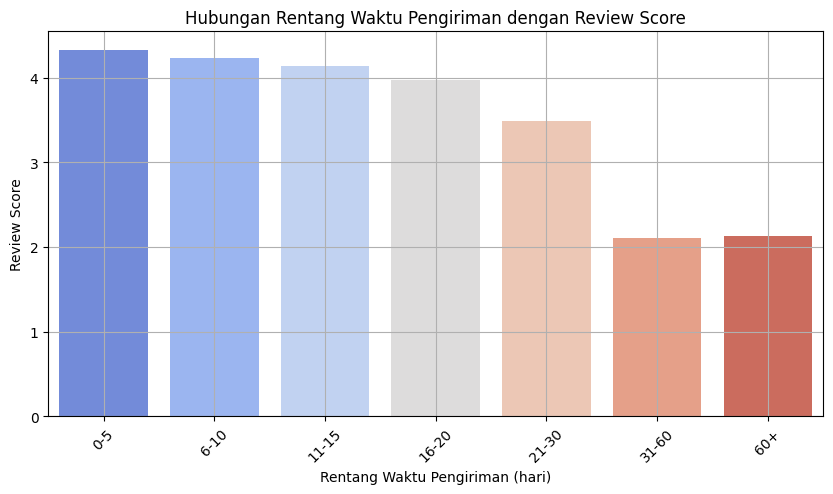

In [77]:
# 2. Hubungan waktu pengiriman dengan review score
dataset['delivery_time'] = (dataset['order_delivered_customer_date'] - dataset['order_purchase_timestamp']).dt.days

# Mengelompokkan waktu pengiriman ke dalam rentang
bins = [0, 5, 10, 15, 20, 30, 60, dataset["delivery_time"].max()]
labels = ["0-5", "6-10", "11-15", "16-20", "21-30", "31-60", "60+"]
dataset["delivery_time_range"] = pd.cut(dataset["delivery_time"], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(10,5))
sns.barplot(x=dataset["delivery_time_range"], y=dataset["review_score"], palette="coolwarm", ci=None)
plt.xlabel("Rentang Waktu Pengiriman (hari)")
plt.ylabel("Review Score")
plt.title("Hubungan Rentang Waktu Pengiriman dengan Review Score")
plt.xticks(rotation=45)
plt.grid()
plt.show()

## **2. Hubungan Waktu Pengiriman dengan Rating Review**
- Rata-rata rating pelanggan menurun seiring bertambahnya waktu pengiriman.
- Pengiriman dalam **1-3 hari memiliki rata-rata rating di atas 4,3**, sedangkan pengiriman lebih dari 10 hari cenderung mendapat rating lebih rendah.
- Pengiriman lebih dari **200 hari** bahkan memiliki rating mendekati **0-2**, menunjukkan ketidakpuasan pelanggan akibat keterlambatan ekstrem.

### Pertanyaan 3: Produk dalam kategori apa yang paling sering dibeli?

<ipython-input-78-2c7022016b30>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_counts.index, y=product_counts.values, palette="coolwarm")


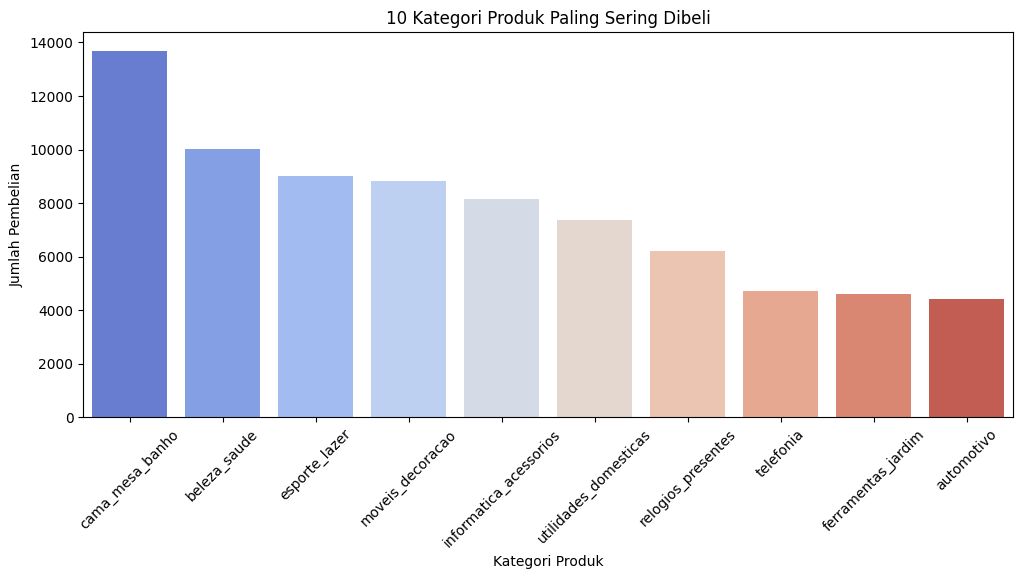

In [78]:
#  Produk dalam kategori apa yang paling sering dibeli?
product_counts = dataset["product_category_name"].value_counts().head(10)

plt.figure(figsize=(12,5))
sns.barplot(x=product_counts.index, y=product_counts.values, palette="coolwarm")
plt.xlabel("Kategori Produk")
plt.ylabel("Jumlah Pembelian")
plt.title("10 Kategori Produk Paling Sering Dibeli")
plt.xticks(rotation=45)
plt.show()

<ipython-input-80-27f3337dfd37>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_prices.values, y=product_prices.index, palette="magma")


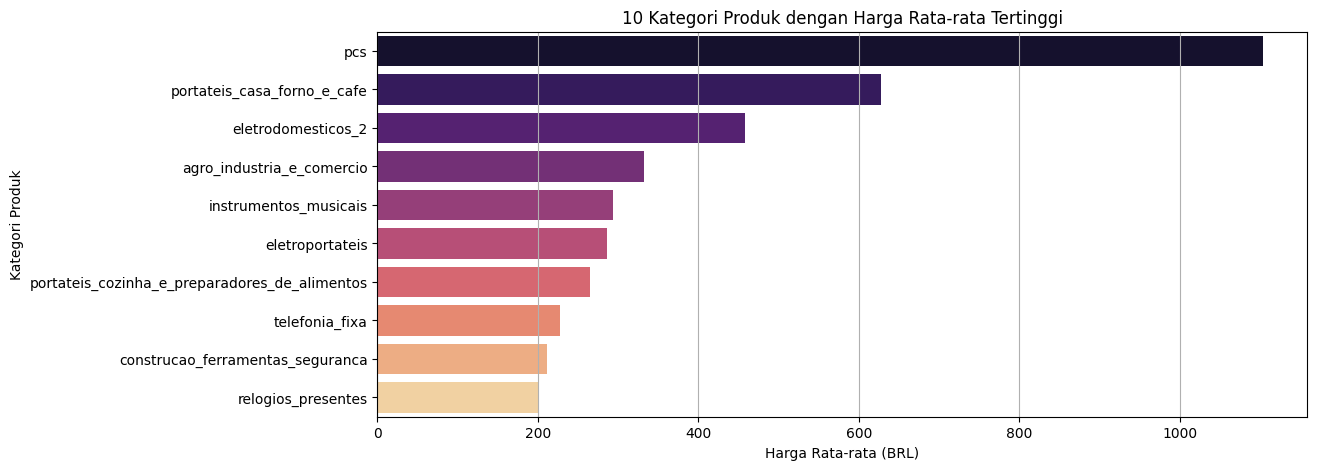

In [80]:
# Harga rata-rata per kategori produk
product_prices = dataset.groupby("product_category_name")["price"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,5))
sns.barplot(x=product_prices.values, y=product_prices.index, palette="magma")
plt.xlabel("Harga Rata-rata (BRL)")
plt.ylabel("Kategori Produk")
plt.title("10 Kategori Produk dengan Harga Rata-rata Tertinggi")
plt.grid(axis="x")
plt.show()


## **3. Produk Paling Populer dan Harga Rata-rata per Kategori**
- **Kategori produk paling sering dibeli:**
  - **cama_mesa_banho (13.697 transaksi)**
  - **beleza_saude (10.029 transaksi)**
  - **esporte_lazer (9.004 transaksi)**
- **Kategori dengan harga rata-rata tertinggi:**
  - **pcs (Rp1.103.689 per unit)**
  - **portateis_casa_forno_e_cafe (Rp627.509 per unit)**
  - **eletrodomesticos_2 (Rp457.529 per unit)**

## Analisis Lanjutan RFM Analysis

Bagaimana pola pembelian pelanggan berdasarkan Recency, Frequency, dan Monetary?

In [81]:
# RFM Analysis
import datetime as dt

# Tentukan tanggal referensi untuk analisis (misalnya, hari terakhir transaksi di dataset)
reference_date = dataset["order_purchase_timestamp"].max()

reference_date

Timestamp('2018-09-03 09:06:57')

In [82]:
# Hitung metrik RFM
rfm = dataset.groupby("customer_unique_id").agg({
    "order_purchase_timestamp": lambda x: (reference_date - x.max()).days,  # Recency
    "order_id": "count",  # Frequency
    "price": "sum"  # Monetary
}).reset_index()

rfm

,customer_unique_id,order_purchase_timestamp,order_id,price
0,0000366f3b9a7992bf8c76cfdf3221e2,115,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,18.90
2,0000f46a3911fa3c0805444483337064,541,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,292,1,180.00
...,...,...,...,...
95414,fffcf5a5ff07b0908bd4e2dbc735a684,451,2,1570.00
95415,fffea47cd6d3cc0a88bd621562a9d061,266,1,64.89
95416,ffff371b4d645b6ecea244b27531430a,572,1,89.90
95417,ffff5962728ec6157033ef9805bacc48,123,1,115.00


In [88]:
rfm.head(20)

,customer_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,115,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,18.90
2,0000f46a3911fa3c0805444483337064,541,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,292,1,180.00
5,0004bd2a26a76fe21f786e4fbd80607f,150,1,154.00
6,00050ab1314c0e55a6ca13cf7181fecf,135,1,27.99
7,00053a61a98854899e70ed204dd4bafe,186,2,382.00
8,0005e1862207bf6ccc02e4228effd9a0,547,1,135.00
9,0005ef4cd20d2893f0d9fbd94d3c0d97,174,1,104.90


In [83]:
# Ubah nama kolom
rfm.columns = ["customer_id", "Recency", "Frequency", "Monetary"]
rfm.columns

Index(['customer_id', 'Recency', 'Frequency', 'Monetary'], dtype='object')

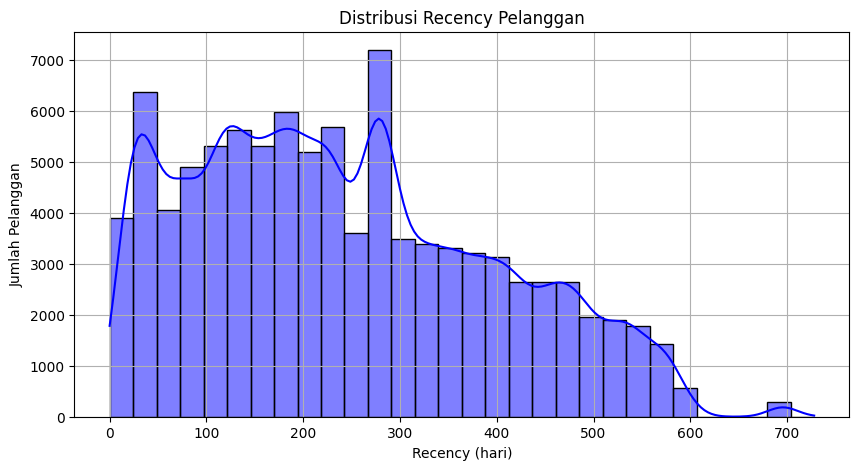

In [84]:
# Visualisasi distribusi Recency
plt.figure(figsize=(10,5))
sns.histplot(rfm["Recency"], bins=30, kde=True, color="blue")
plt.xlabel("Recency (hari)")
plt.ylabel("Jumlah Pelanggan")
plt.title("Distribusi Recency Pelanggan")
plt.grid()
plt.show()

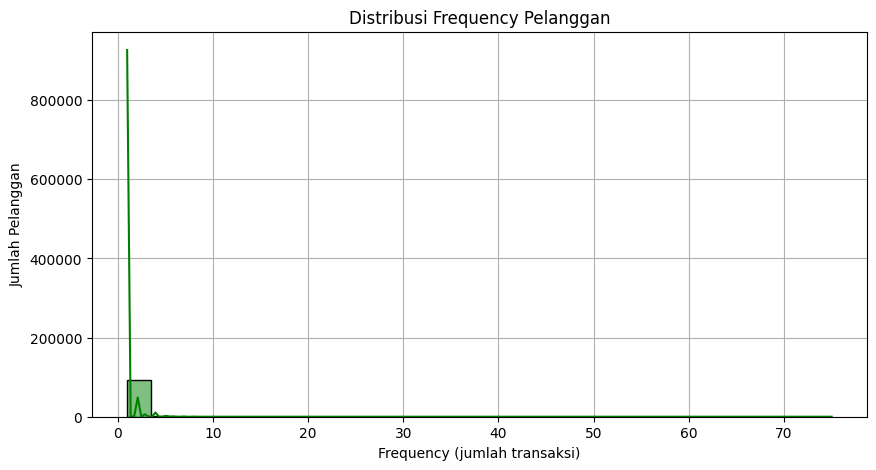

In [85]:
# Visualisasi distribusi Frequency
plt.figure(figsize=(10,5))
sns.histplot(rfm["Frequency"], bins=30, kde=True, color="green")
plt.xlabel("Frequency (jumlah transaksi)")
plt.ylabel("Jumlah Pelanggan")
plt.title("Distribusi Frequency Pelanggan")
plt.grid()
plt.show()

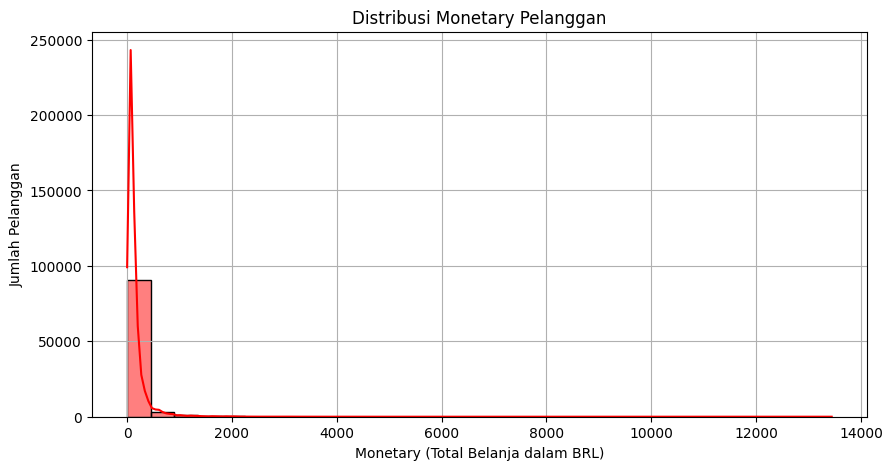

In [86]:
# Visualisasi distribusi Monetary
plt.figure(figsize=(10,5))
sns.histplot(rfm["Monetary"], bins=30, kde=True, color="red")
plt.xlabel("Monetary (Total Belanja dalam BRL)")
plt.ylabel("Jumlah Pelanggan")
plt.title("Distribusi Monetary Pelanggan")
plt.grid()
plt.show()

### **1. Banyak Pelanggan yang Hanya Melakukan Satu Kali Pembelian (Frequency = 1)**
   - Hampir semua pelanggan dalam sampel hanya melakukan **1 kali transaksi**.  
   - Hal ini menunjukkan bahwa **retensi pelanggan masih rendah**, dan sebagian besar pelanggan belum kembali untuk melakukan pembelian ulang.  
   - **Strategi yang bisa diterapkan:**  
     - Program **loyalty atau diskon untuk pelanggan lama** agar mereka kembali berbelanja.  
     - **Email marketing atau notifikasi promo** kepada pelanggan yang pernah berbelanja.

### **2. Banyak Pelanggan yang Tidak Berbelanja dalam Waktu Lama (Recency > 100 hari)**
   - Beberapa pelanggan terakhir berbelanja lebih dari **100 hari yang lalu**, bahkan ada yang lebih dari **500 hari**.  
   - Ini menandakan bahwa pelanggan tidak melakukan transaksi dalam waktu lama dan berisiko menjadi pelanggan yang hilang (**churned customers**).  
   - **Strategi yang bisa diterapkan:**  
     - **Re-engagement campaign** seperti mengirimkan **email pengingat atau promo spesial** kepada pelanggan lama.  
     - Menganalisis **apakah ada faktor tertentu yang menyebabkan pelanggan berhenti berbelanja** (misalnya, kualitas produk, layanan, atau harga).

### **3. Nilai Monetary Bervariasi, tetapi Banyak yang Rendah**
   - Sebagian besar pelanggan memiliki **nilai Monetary yang relatif rendah** (di bawah **200 BRL**).  
   - Namun, ada pelanggan dengan transaksi yang lebih tinggi, seperti customer_id **00053a61a98854899e70ed204dd4bafe**, yang memiliki **Monetary 382 BRL dan Frequency 2**.  
   - **Strategi yang bisa diterapkan:**  
     - Identifikasi **pelanggan dengan Monetary tinggi** dan berikan **penawaran eksklusif** atau rekomendasi produk yang sesuai dengan kebiasaan belanja mereka.  
     - **Strategi bundling atau upselling** untuk meningkatkan nilai transaksi rata-rata pelanggan.

## Conclusion

### Conclusion pertanyaan 1: Pola Transaksi Berdasarkan Waktu

## **1. Pola Transaksi**
- Jumlah pembelian bervariasi berdasarkan **hari dalam seminggu dan bulan dalam setahun**.
- Waktu dengan transaksi tertinggi dapat dimanfaatkan untuk **strategi promosi dan diskon

### Conclusion pertanyaan 2: Hubungan Waktu Pengiriman dengan Rating Review

## **2. Hubungan Waktu Pengiriman dan Review Score**
- Semakin lama waktu pengiriman, **rating pelanggan cenderung menurun**.
- **Kecepatan pengiriman** sangat penting untuk meningkatkan kepuasan pelanggan.
- Perlu evaluasi mitra logistik agar pengiriman lebih efisien.

### Conclusion pertanyaan 3: Produk yang Paling Sering Dibeli oleh Pelanggan

## **3a. Produk yang Paling Sering Dibeli**
- Kategori produk tertentu memiliki jumlah pembelian lebih tinggi.
- Informasi ini berguna untuk **optimasi stok, rekomendasi produk, dan strategi pemasaran**.

## **3b. Harga Rata-rata Per Kategori Produk**
- Beberapa kategori memiliki harga lebih tinggi dibanding yang lain.
- Bisa digunakan untuk memahami **perilaku belanja pelanggan dan strategi penetapan harga**.

### Conclusion RFM Analysis

## **4. Hasil RFM Analysis**
- Mayoritas pelanggan hanya melakukan **satu kali transaksi**.
- **Retensi pelanggan masih rendah**, perlu strategi **repeat purchase**.
- Strategi yang bisa diterapkan:
  - **Program loyalitas & promosi khusus pelanggan lama**.
  - **Rekomendasi produk yang dipersonalisasi**.
  - **Strategi re-engagement bagi pelanggan lama**.